In [1]:
from os import walk
import numpy as np
import cv2
import scipy as scipy
import matplotlib.pyplot as plt
from astropy.io import fits
import polarTransform
from astropy.utils.data import get_pkg_data_filename
from scipy.stats import wasserstein_distance

from tqdm import tqdm

import Bicone_Classifier


In [2]:
def find_nth(haystack, needle, n):
    start = haystack.find(needle)
    while start >= 0 and n > 1:
        start = haystack.find(needle, start+len(needle))
        n -= 1
    return start

## Test the classifier

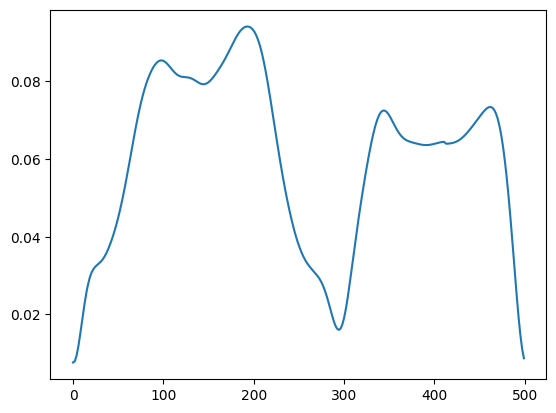

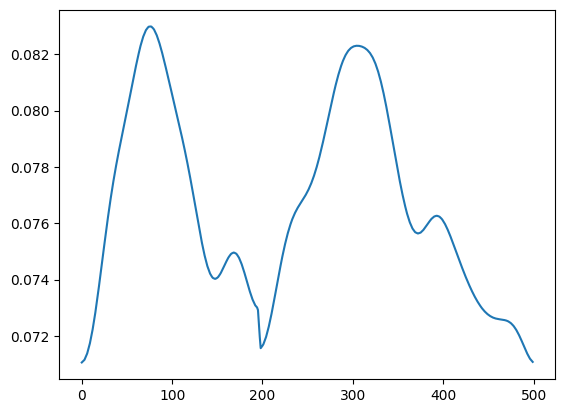

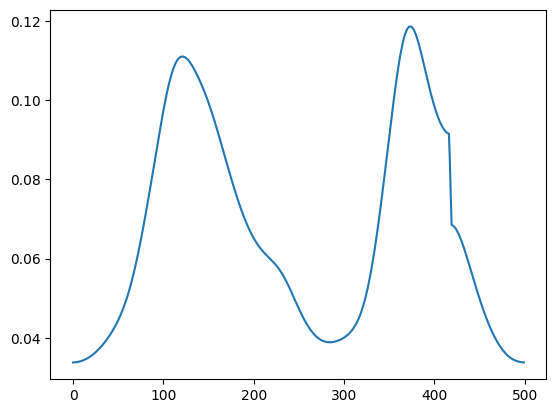

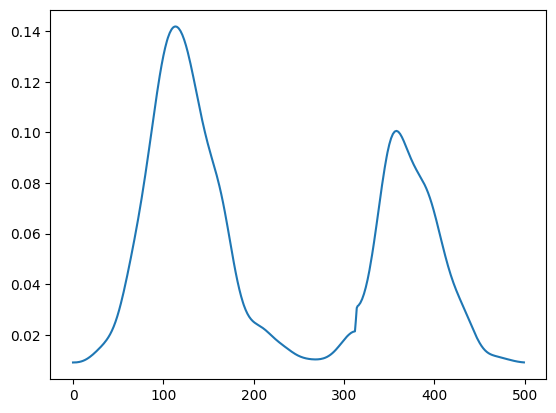

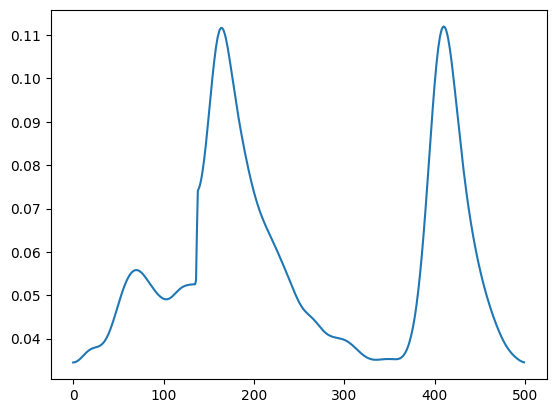

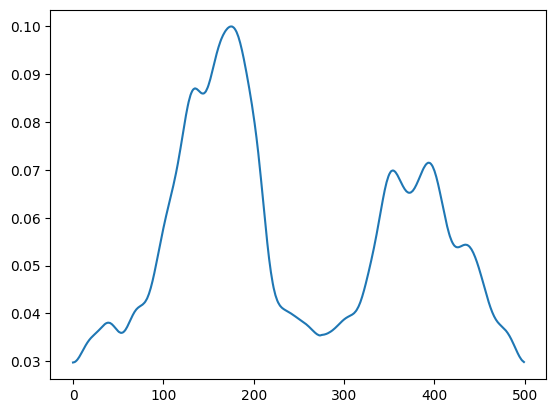

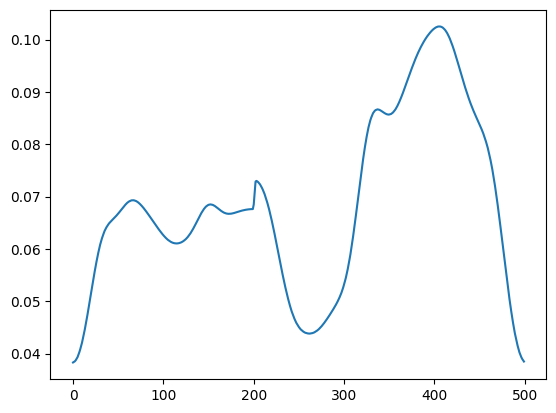

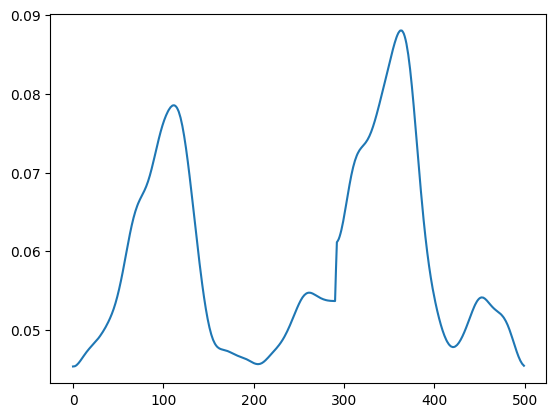

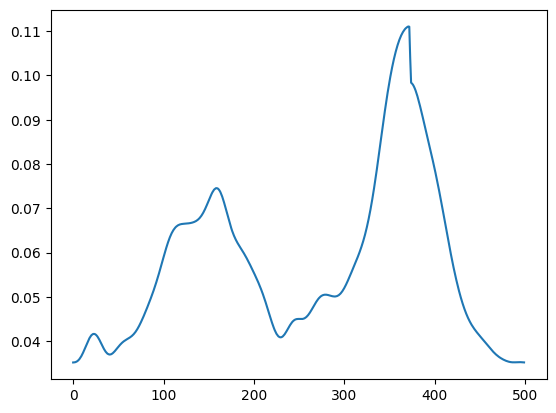

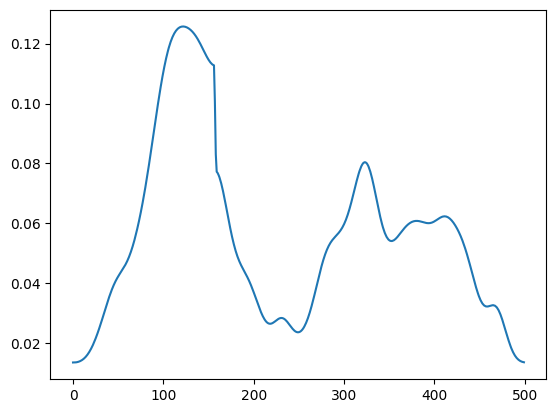

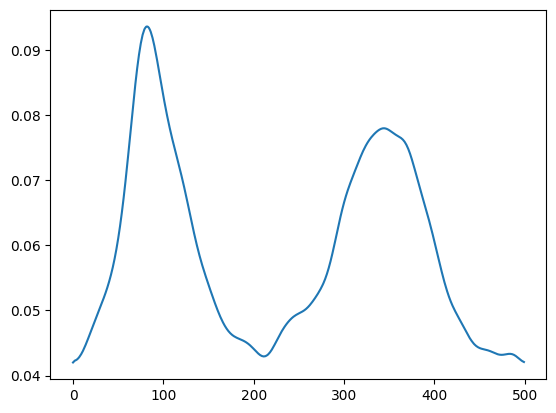

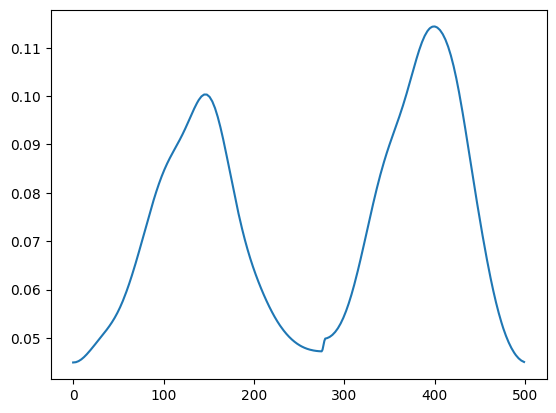

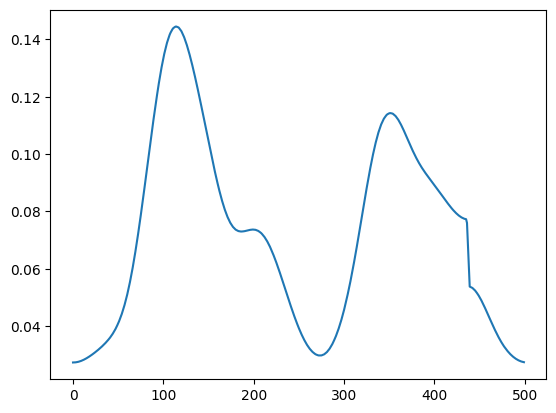

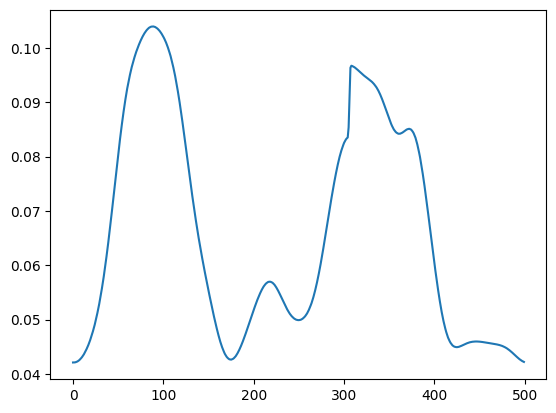

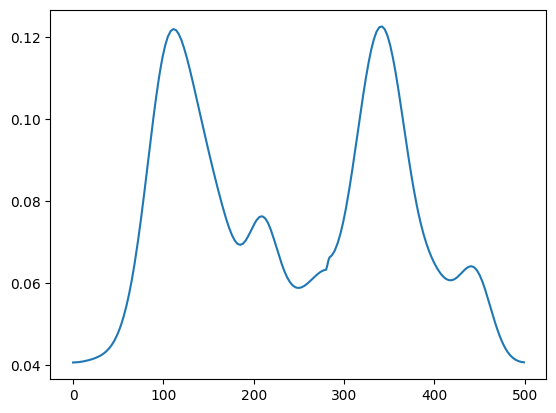

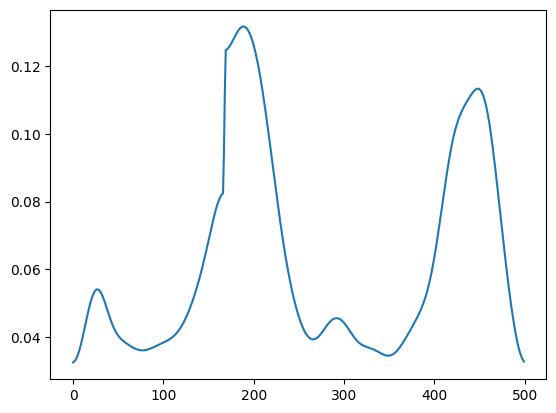

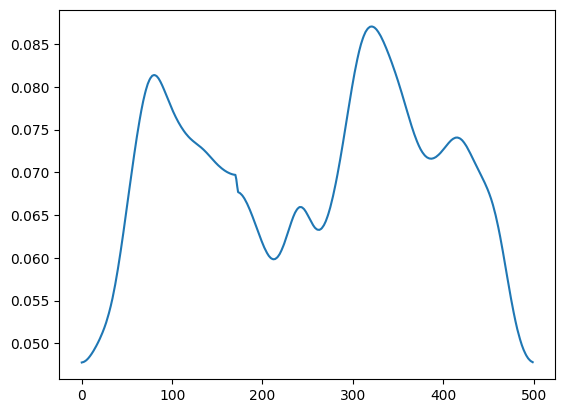

In [4]:
BC_PATH = '/Users/runquanguan/Documents/Research/MaNGA-AGN/Pipeline&Instrction/obvious_bicone_feature_position.fits'
FOLDER = '/Users/runquanguan/Documents/Research/MaNGA-AGN/Data/'
hdul = fits.open(BC_PATH)
hdu = hdul[1].data

for data in hdu:
    plateifu = str(data[0])
    FILENAME = 'manga-' + plateifu + '-MAPS-SPX-MILESHC-MASTARSSP.fits'
    FILE_PATH = FOLDER+FILENAME
    # Define arrays
    BC_EW_hist = Bicone_Classifier.generate_profile_histogram(FILE_PATH)[0]
    # Find the loss using Earth Moving Distance
    plt.plot(BC_EW_hist)
    plt.show()

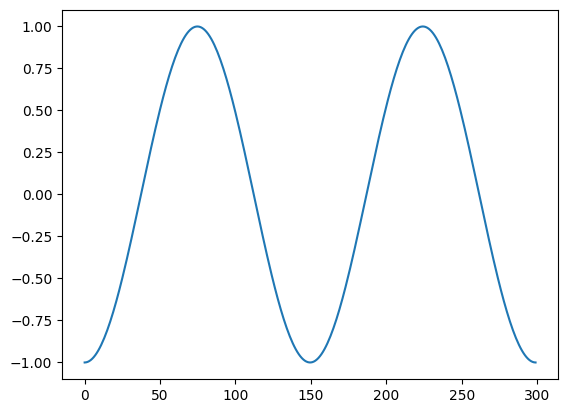

In [8]:
x = np.linspace(np.pi, 5*np.pi, 300)
y = np.cos(x)
plt.plot(y)
plt.show()

## Test the pipeline using bicone galaxies

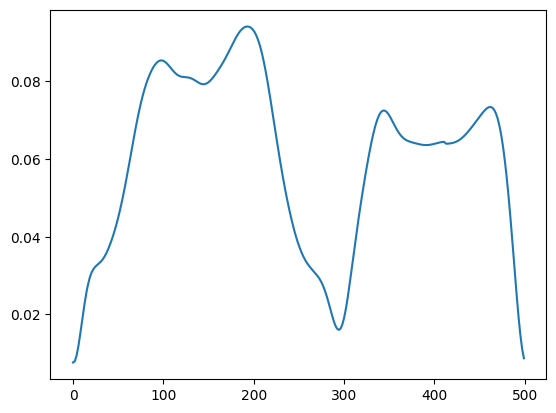

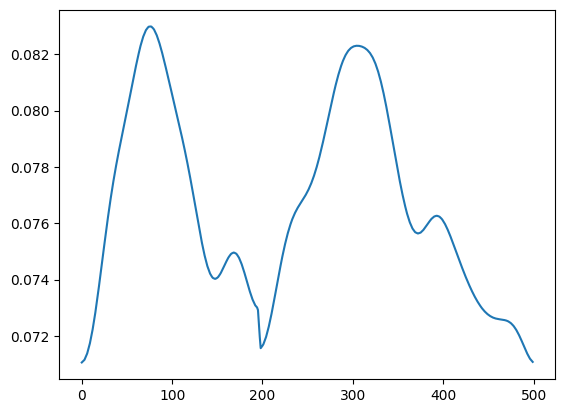

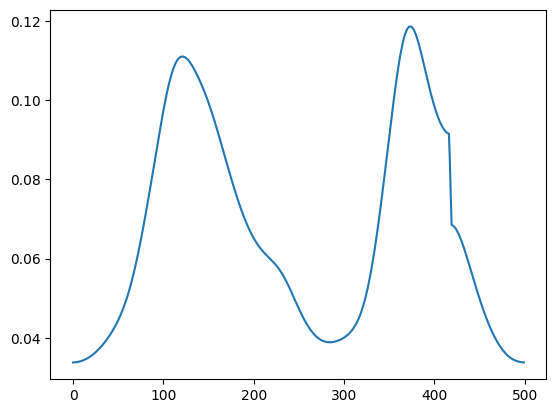

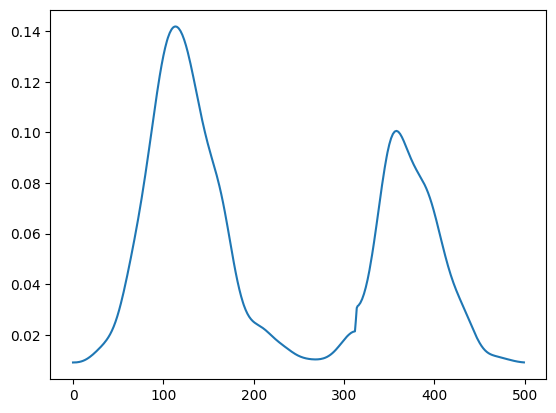

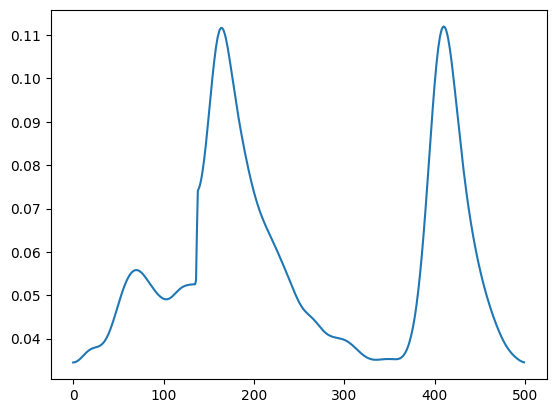

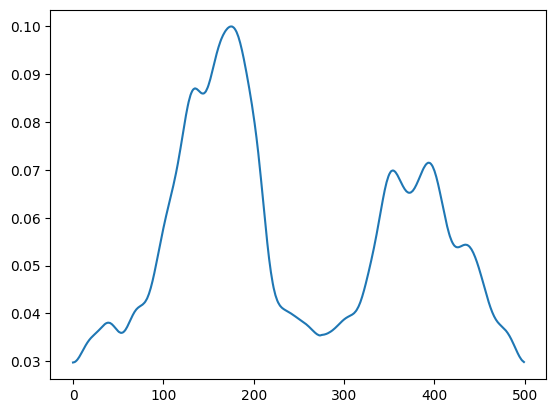

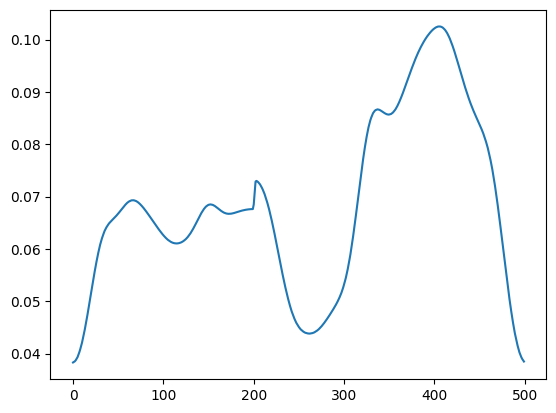

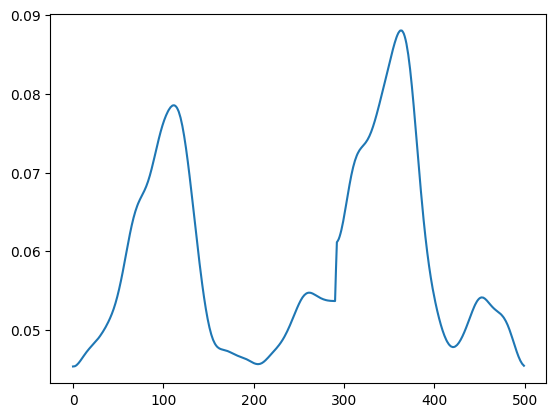

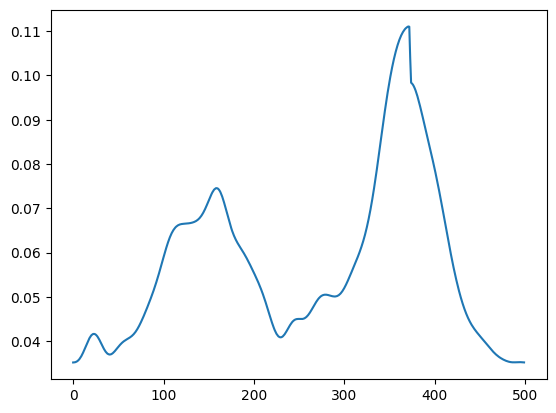

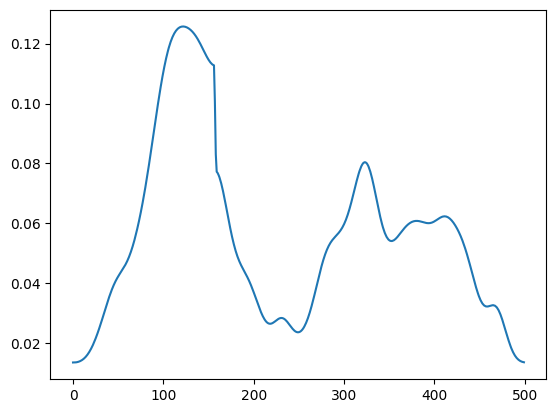

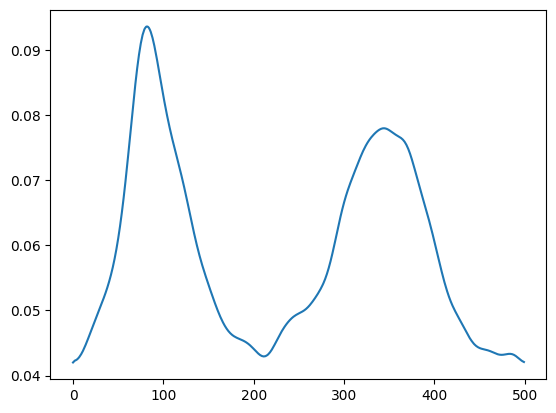

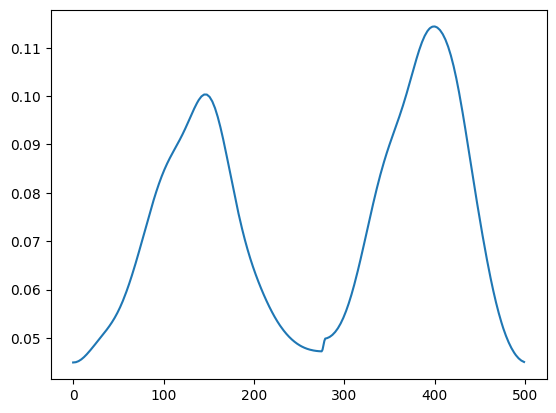

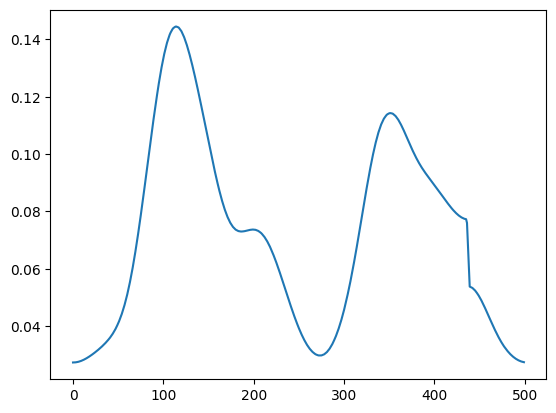

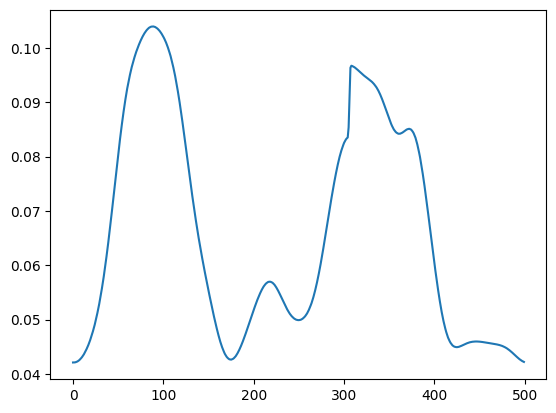

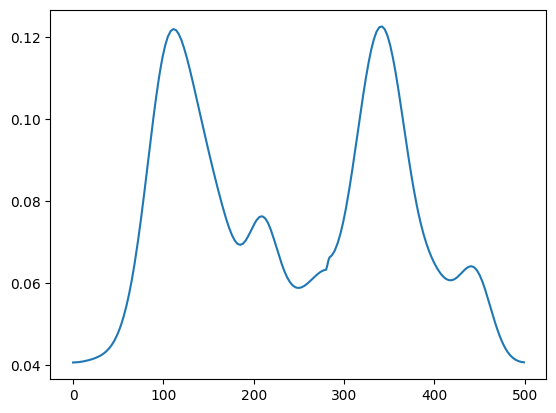

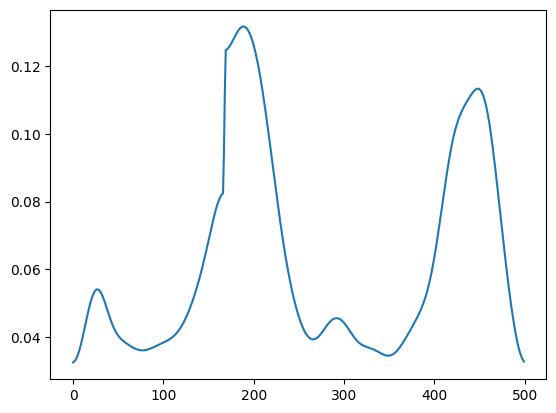

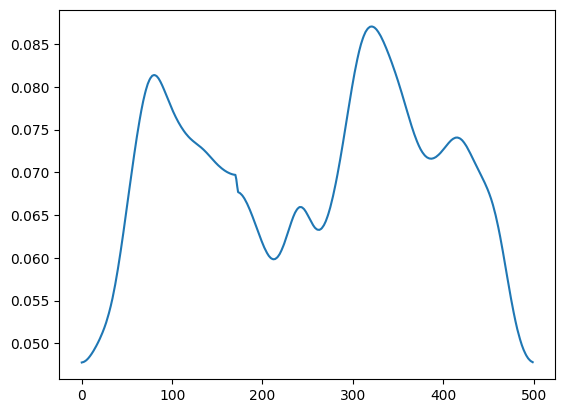

In [41]:
# Load examples
BC_PATH = '/Users/runquanguan/Documents/Research/MaNGA-AGN/Pipeline&Instrction/obvious_bicone_feature_position.fits'
FOLDER = '/Users/runquanguan/Documents/Research/MaNGA-AGN/Data/'
hdul = fits.open(BC_PATH)
hdu = hdul[1].data

for data in hdu:
        plateifu = str(data[0])
        FILENAME = 'manga-' + plateifu + '-MAPS-SPX-MILESHC-MASTARSSP.fits'
        FILE_PATH = FOLDER+FILENAME
        # Define arrays
        BC_EW_hist = Bicone_Classifier.generate_profile_histogram(FILE_PATH)[0]
        # Find the loss using Earth Moving Distance
        plt.plot(BC_EW_hist)
        plt.show()

## Iterate the dataset

In [4]:
FOLDER = '/Users/runquanguan/Documents/Research/MaNGA-AGN/Data/'
filenames = next(walk(FOLDER), (None, None, []))[2]  # [] if no file

In [5]:

loss_list = []
for file in tqdm(filenames):
    if file == '.DS_Store':
        pass
    else:
        PATH = FOLDER+file
        test = Bicone_Classifier.generate_profile_histogram(PATH)
        loss = Bicone_Classifier.calculate_maximum(test)
        loss_list.append(loss)

100%|██████████| 10738/10738 [1:31:48<00:00,  1.95it/s] 


In [39]:
sort_list = sorted(loss_list, key = float)
sort_array = np.array(sort_list)
#print(sort_array[0:20])

sampled_plateifu_list = []
for i in sort_list[0:20]:
    loss_index = loss_list.index(i)
    sampled_plateifu_PATH = filenames[loss_index]
    idx1 = find_nth(sampled_plateifu_PATH, '-', 1) 
    idx3 = find_nth(sampled_plateifu_PATH, '-', 3)
    sampled_plateifu = sampled_plateifu_PATH[idx1+1:idx3]
    sampled_plateifu_list.append(sampled_plateifu)
    
sampled_plateifu_list

['8240-6103',
 '8257-9101',
 '8554-3703',
 '8240-9101',
 '8458-3704',
 '12035-12705',
 '8257-6103',
 '8312-9101',
 '9504-6103',
 '9513-9101',
 '9504-9101',
 '9870-12704',
 '8312-6103',
 '9513-6103',
 '7963-12701',
 '9514-12704',
 '8087-9102',
 '8329-1901',
 '11760-12705',
 '10223-12705']